# Тема “Обучение без учителя”
## Задание 1
Импортируйте библиотеки pandas, numpy и matplotlib.

Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.

Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью функции train_test_split так, чтобы размер тестовой выборки составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.


Масштабируйте данные с помощью StandardScaler.
Постройте модель TSNE на тренировочный данных с параметрами: n_components=2, learning_rate=250, random_state=42.

Постройте диаграмму рассеяния на этих данных.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
%config InlineBackend.figure_formats = 'svg'

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = pd.DataFrame(boston.target, columns=['price'])

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
scaler.fit(X)

X_train_scaled = scaler.transform(X_train)
#X_test_scaled = scaler.transform(X_test)

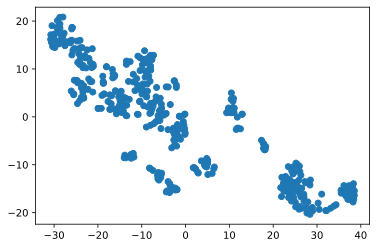

In [4]:
tsne = TSNE(n_components=2, random_state=42, learning_rate=250)
X_train_embedded = tsne.fit_transform(X_train_scaled)
x, y = zip(*X_train_embedded)
plt.scatter(x, y)

## Задание 2
С помощью KMeans разбейте данные из тренировочного набора на 3 кластера, используйте все признаки из датафрейма X_train. Параметр max_iter должен быть равен 100, random_state сделайте равным 42.

Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE, и раскрасьте точки из разных кластеров разными цветами.

Вычислите средние значения price и CRIM в разных кластерах.

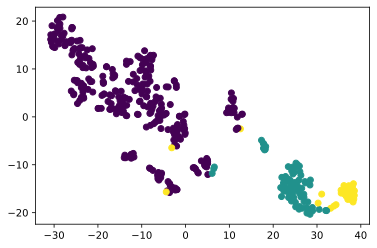

In [5]:
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)
clusters = kmeans.fit_predict(X_train)
plt.scatter(x, y, c=clusters)

In [6]:
X_train[['CRIM']].assign(price=y_train, cluster=clusters).groupby('cluster').mean()

,CRIM,price
cluster,,
0,0.404863,25.168687
1,11.745662,17.442105
2,14.360380,13.196774


## *Задание 3
Примените модель KMeans, построенную в предыдущем задании, к данным из тестового набора.

Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

In [7]:
clusters_test = kmeans.predict(X_test)
X_test[['CRIM']].assign(price=y_test, cluster=clusters_test).groupby('cluster').mean()

,CRIM,price
cluster,,
0,0.246421,23.911594
1,8.469302,17.392308
2,19.021666,12.814286
